In [1]:
from google.colab import files
files.upload()


Saving customer_journey.csv to customer_journey.csv


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("customer_journey.csv")
df.head()


,SessionID,UserID,Timestamp,PageType,DeviceType,Country,ReferralSource,TimeOnPage_seconds,ItemsInCart,Purchased
0,session_0,user_2223,2025-01-20 22:53:34,home,Desktop,India,Social Media,55,0,0
1,session_1,user_2192,2025-02-26 12:57:10,home,Tablet,Germany,Email,99,0,0
2,session_1,user_2192,2025-02-26 12:59:11,product_page,Tablet,Germany,Email,121,0,0
3,session_2,user_1708,2025-06-24 15:40:46,home,Mobile,India,Google,160,0,0
4,session_3,user_2976,2025-06-11 07:21:02,home,Tablet,UK,Google,113,0,0


In [5]:
df.columns


Index(['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country',
       'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased'],
      dtype='object')

In [6]:
df['group'] = np.where(df['ReferralSource'].str.lower()=='email','Test','Control')


In [7]:
df['converted'] = df['Purchased']


In [8]:
control = df[df['group']=='Control']['converted']
test = df[df['group']=='Test']['converted']

control_rate = control.mean()
test_rate = test.mean()

print("Control:", control_rate)
print("Test:", test_rate)


Control: 0.3991795519091196
Test: 0.3907222914072229


In [9]:
t_stat, p_value = stats.ttest_ind(test, control, equal_var=False)
print("p-value:", p_value)


p-value: 0.3962461947800452


In [10]:
diff = test_rate - control_rate
se = np.sqrt(test.var()/len(test) + control.var()/len(control))

ci_low = diff - 1.96*se
ci_high = diff + 1.96*se

print(ci_low, ci_high)


-0.02799525322643759 0.011080732222644274


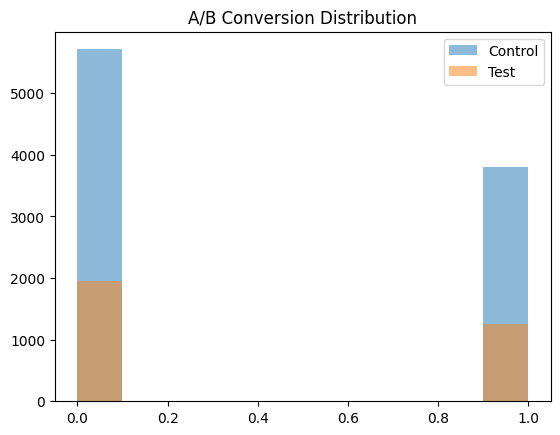

In [11]:
plt.hist(control, alpha=0.5, label='Control')
plt.hist(test, alpha=0.5, label='Test')
plt.legend()
plt.title("A/B Conversion Distribution")
plt.show()


In [12]:
if p_value < 0.05:
    print("Statistically significant → Use Test version")
else:
    print("Not significant → Keep current version")


Not significant → Keep current version


In [13]:
summary = pd.DataFrame({
    "metric":["control_rate","test_rate","difference","p_value"],
    "value":[control_rate,test_rate,diff,p_value]
})

summary.to_csv("ab_test_summary.csv", index=False)
